In [1]:
!pip install -q tensorflow

In [4]:
# STEP 1: IMPORTS
# =====================
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [5]:
# STEP 2: CREATE SYNTHETIC DATA
# =====================
# Create a synthetic binary classification dataset with 100 columns
X, y = make_classification(
    n_samples=2000,  # total rows
    n_features=100,  # total columns
    n_informative=15,  # columns that actually help predict
    n_redundant=10,  # columns that are linear combinations of informative ones
    n_classes=2,  # binary classification
    random_state=42,
)

In [7]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2000, 100)
Shape of y: (2000,)


In [8]:
# Convert to DataFrame for clarity
data = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(100)])
data["target"] = y

In [9]:
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,...,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,target
0,-1.831325,1.705776,-6.409613,0.106138,-0.596675,0.411986,0.675301,-1.078317,-1.603839,-2.012962,3.630375,0.871995,-1.763987,2.618338,-0.789962,-2.191597,-0.120161,0.864259,-0.852064,-1.331516,-0.995299,-1.211833,0.765130,-0.956036,0.233875,0.463259,-1.471073,0.365714,0.911686,-0.576012,-0.514567,0.118286,-0.613039,-1.169768,-6.227693,-4.356510,0.292557,0.824060,1.800005,0.445180,...,-0.805370,-0.620264,1.146027,-0.969174,-1.164590,-0.739312,2.168395,0.623603,0.070850,0.024503,-0.635478,0.678964,1.195136,0.139612,-3.011225,-0.401100,0.411481,0.511038,0.704356,0.885829,-0.843830,-0.437126,0.595855,1.990476,0.175642,-0.366639,1.028861,-3.690500,-0.895707,-3.883879,0.123244,0.952772,0.780890,-1.552003,-1.035828,0.007852,0.321994,-0.558218,0.073804,0
1,0.055527,-1.150081,-11.759549,-1.564209,2.013774,3.791818,-0.191420,-1.351709,-2.729311,0.208410,3.357535,0.581636,-0.531465,-1.044356,-1.848899,1.252259,-1.251319,-0.156941,2.157164,4.290855,-0.956360,-0.079116,-0.505013,-0.593369,1.477860,-0.574047,3.538826,-1.265345,0.469077,1.020249,2.268332,-0.805498,0.796066,-3.715974,1.938443,11.427913,-1.217690,-0.817613,-2.482068,-0.220663,...,-0.341598,0.272237,1.309198,1.917306,-2.189675,-1.892162,3.673565,1.044365,-0.924129,-1.325803,1.248546,-0.588206,6.660544,0.654137,-2.100124,-1.308274,-1.120078,0.261446,-0.179002,0.372701,-0.844108,-0.413505,-0.512504,-0.817566,0.683589,0.385921,0.727333,9.899993,-0.571014,-4.476442,0.774865,0.399656,1.360654,0.967866,-1.038877,1.346742,-1.605758,0.633867,-0.902927,1
2,-0.640659,0.639937,-3.458904,-0.011720,1.005167,1.281563,1.125322,1.144527,3.200045,0.849256,-0.382314,6.625499,-0.529004,4.564363,0.578850,1.482010,-0.252713,0.670918,0.773407,-1.118539,0.701986,0.742976,5.386660,-2.595208,1.165708,1.722819,-1.687607,0.056486,-0.478218,0.993672,-1.363157,1.065363,1.409895,-0.181352,-0.763471,-3.921678,-0.019068,1.022642,1.608544,-0.033698,...,0.978129,0.611772,1.524871,-1.066631,1.174574,-0.099135,2.957721,0.959730,-0.166192,1.368034,0.202678,1.411087,-1.457776,0.031321,-1.255951,1.150123,-2.398323,-0.836920,-0.877877,0.864138,0.039999,-0.350408,-1.249283,0.893628,-1.336904,-0.441486,2.111239,-6.625749,0.073722,-0.130595,0.541519,-1.104718,0.046938,0.362005,-0.025992,-1.569569,2.066549,0.337365,-0.481744,0
3,-0.156999,-0.990204,-3.398255,-1.859545,0.616371,1.925993,1.378323,-0.529528,-0.634812,-1.537050,5.644366,14.648984,-0.309891,2.235897,0.837573,-1.000606,-0.373560,-0.149987,1.468534,-5.606756,1.132070,-1.342641,-7.351131,1.148285,-0.284000,0.679012,-5.048130,0.407653,1.596041,-0.242820,0.160122,-1.350096,1.111888,-0.590136,-12.696369,-1.338759,-0.464031,-0.019503,3.768529,-0.817264,...,-1.059828,-0.666724,-0.360861,-3.665335,-0.114458,0.284482,-3.569652,-1.253976,-0.035042,1.663888,0.067351,-0.790802,4.105535,0.855983,-0.291387,0.875025,0.661639,-0.133393,0.480189,0.268291,0.837969,0.367467,-0.335677,0.062552,-0.741428,0.102630,-1.480329,-11.436154,0.607578,-2.460205,-0.402951,-0.653391,-0.710473,-3.744896,-0.798951,-1.145614,0.058567,0.183561,-0.131183,0
4,0.315882,1.522262,1.523889,0.956659,0.415149,2.102904,-1.599038,-0.904871,-0.731312,

In [10]:
X = data.drop("target", axis=1)
y = data["target"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Step 3 - Feature Engineering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Step 4 - Build the ANN
model = Sequential([
    Dense(64, activation='relu', input_shape = (X_test_scaled.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [17]:
# STEP 5: COMPILE THE MODEL
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [18]:
# STEP 6: TRAIN THE MODEL
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data = (X_test_scaled,y_test),
    epochs = 25

)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6062 - loss: 0.6592 - val_accuracy: 0.7000 - val_loss: 0.5626
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.7744 - loss: 0.4915 - val_accuracy: 0.7725 - val_loss: 0.4863
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8331 - loss: 0.3984 - val_accuracy: 0.7850 - val_loss: 0.4494
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8725 - loss: 0.3300 - val_accuracy: 0.8075 - val_loss: 0.4247
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.8969 - loss: 0.2712 - val_accuracy: 0.8025 - val_loss: 0.4091
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.9231 - loss: 0.2222 - val_accuracy: 0.8050 - val_loss: 0.3990
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.9569 - loss: 0.1757 - val_accuracy: 0.8075 - val_loss: 0.3911
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.9688 - loss: 0.1377 - val_accuracy: 0.81

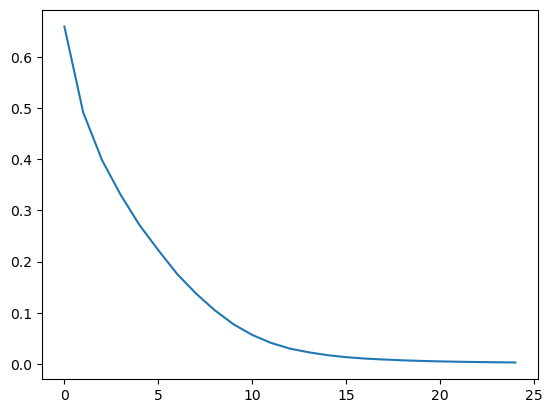

In [22]:
plt.plot(history.history['loss'])

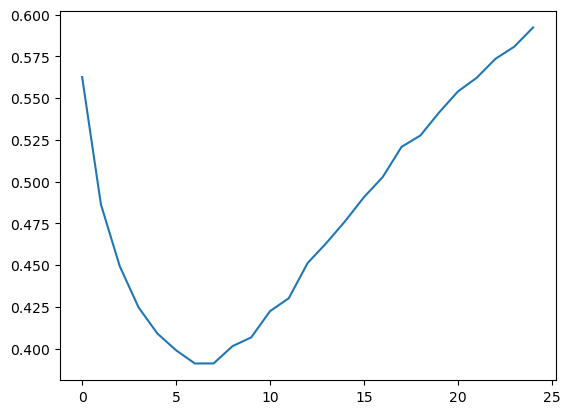

In [23]:
plt.plot(history.history['val_loss'])

In [24]:
loss, acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {acc:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8375 - loss: 0.5923 
Test Accuracy: 0.8375


In [25]:
# Predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[162  38]
 [ 27 173]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       200
           1       0.82      0.86      0.84       200

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400

